In [63]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model

df = pd.read_csv('World_Population_2024.csv')

df = df.rename(columns={'Year\r\n(July 1)': 'Year'})

df = df.sort_values(by='Year')

df['Population'] = df['Population'].str.replace(',', '').astype(int)

# df.dtypes
df

,Year,Population,Yearly %\r\nChange,Yearly\r\nChange,Median\r\nAge,Fertility\r\nRate,Density\r\n(P/Km²)
0,2024,"8,118,835,999",0.91 %,"73,524,552",30.7,2.31,55
1,2023,"8,045,311,447",0.88 %,"70,206,291",30.5,2.31,54
2,2022,"7,975,105,156",0.83 %,"65,810,005",30.2,2.31,54
3,2021,"7,909,295,151",0.87 %,"68,342,271",30.0,2.32,53
4,2020,"7,840,952,880",0.98 %,"76,001,848",29.7,2.35,53
5,2015,"7,426,597,537",1.23 %,"88,198,886",28.0,2.52,50
6,2010,"6,985,603,105",1.27 %,"85,485,397",27.0,2.59,47
7,2005,"6,558,176,119",1.30 %,"81,855,429",26.0,2.62,44
8,2000,"6,148,898,975",1.37 %,"81,135,904",25.0,2.73,41
9,1995,"5,743,219,454",1.56 %,"85,408,718",24.0,2.88,39


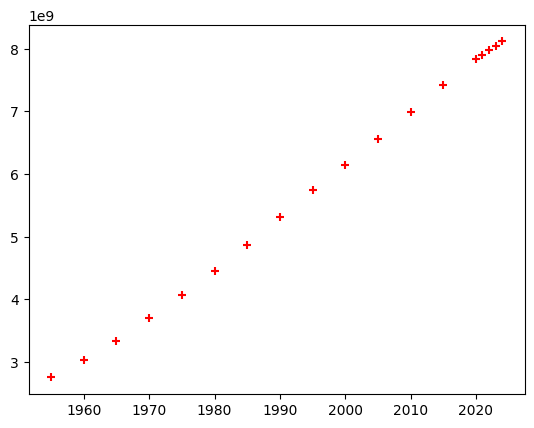

In [24]:
%matplotlib inline
plt.scatter(df.Year, df.Population, color='red', marker='+')

In [53]:
reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df.Population)

LinearRegression()

In [61]:
# Convert the input data into a 2D array
# predict_data = np.array([2050]).reshape(1, -1)
yr = 2050
predict_data = [[yr]]
# predict_data = pd.read_csv("Predict_Population.csv")

# Make predictions
predictions = reg.predict(predict_data)

predictions

# predict_data['predictions'] = predictions

# predict_data


/opt/anaconda3/envs/prediction_harbour/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.02083644e+10])

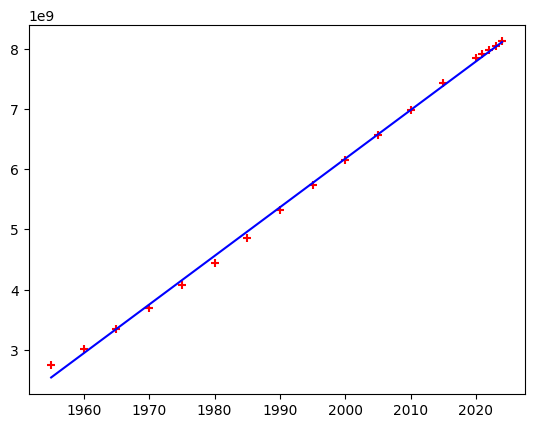

In [54]:
%matplotlib inline
plt.scatter(df.Year, df.Population, color='red', marker='+')
plt.plot(df.Year, reg.predict(df[['Year']]), color='blue')

In [45]:
reg.coef_

array([80720207.112998])

In [46]:
reg.intercept_

-155268060185.24014

In [55]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "../population_prediction_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(reg, file)